<a href="https://colab.research.google.com/github/charlotteprevost/portfolio/blob/master/STAT_408_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOSTON HOUSING DATA

In [5]:
#devtools::install_github("rstudio/keras")

houses <- read.csv("/content/HousingData.csv")
head(houses)

CRIM    ZN INDUS CHAS NOX   RM    AGE  DIS    RAD TAX PTRATIO B      LSTAT
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90   NA 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  MEDV
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

In [6]:
# Import Kaggle dataset
View(houses)

cat("Explanation of columns: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html")

# Variables (14)
# CRIM     	per capita crime rate by town
# ZN       	proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    	proportion of non-retail business acres per town
# CHAS     	Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX      	nitric oxides concentration (parts per 10 million)
# RM       	average number of rooms per dwelling
# AGE      	proportion of owner-occupied units built prior to 1940
# DIS      	weighted distances to five Boston employment centers
# RAD     	index of accessibility to radial highways
# TAX      	full-value property-tax rate per $10,000
# PTRATIO  	pupil-teacher ratio by town
# B        		1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    	% lower status of the population
# MEDV     	Median value of owner-occupied homes in $1000's


# Questions:

# 1. What are the top 3 significant predictors of home median value?
# 2. How will 10% increase in tax influence the regression model?
# 3. What is the price difference of buying a house near Charles River?


# Regressing median home value on all predictors

# R dataset - no missing values, no issues
# Runs a linear regression model of medv on all predictors
#bos_medv_lm = lm(medv ~.,data = Boston)
#summary(bos_medv_lm)

# Kaggle dataset - dropping the missing values
# Runs a linear regression model of medv on all predictors
hous_medv_lm = lm(MEDV ~.,data = houses)
summary(hous_medv_lm)

# Explains the result
cat("\nWhy does Kaggle data set have a better R^2 ???")

CRIM     ZN   INDUS CHAS NOX   RM    AGE   DIS    RAD TAX PTRATIO B     
1   0.00632  18.0 2.31   0   0.538 6.575  65.2 4.0900 1   296 15.3    396.90
2   0.02731   0.0 7.07   0   0.469 6.421  78.9 4.9671 2   242 17.8    396.90
3   0.02729   0.0 7.07   0   0.469 7.185  61.1 4.9671 2   242 17.8    392.83
4   0.03237   0.0 2.18   0   0.458 6.998  45.8 6.0622 3   222 18.7    394.63
5   0.06905   0.0 2.18   0   0.458 7.147  54.2 6.0622 3   222 18.7    396.90
6   0.02985   0.0 2.18   0   0.458 6.430  58.7 6.0622 3   222 18.7    394.12
7   0.08829  12.5 7.87  NA   0.524 6.012  66.6 5.5605 5   311 15.2    395.60
8   0.14455  12.5 7.87   0   0.524 6.172  96.1 5.9505 5   311 15.2    396.90
9   0.21124  12.5 7.87   0   0.524 5.631 100.0 6.0821 5   311 15.2    386.63
10  0.17004  12.5 7.87  NA   0.524 6.004  85.9 6.5921 5   311 15.2    386.71
11  0.22489  12.5 7.87   0   0.524 6.377  94.3 6.3467 5   311 15.2    392.52
12  0.11747  12.5 7.87   0   0.524 6.009  82.9 6.2267 5   311 15.2    396.90
13  0.09378  12.5 7.87   0   0.524 5.889  39.0 5.4509 5   311 15.2    390.50
14  0.62976   0.0 8.14   0   0.538 5.949  61.8 4.7075 4   307 21.0    396.90
15  0.63796   0.0 8.14  NA   0.538 6.096  84.5 4.4619 4   307 21.0    380.02
16  0.62739   0.0 8.14   0   0.538 5.834  56.5 4.4986 4   307 21.0    395.62
17  1.05393   0.0 8.14   0   0.538 5.935  29.3 4.4986 4   307 21.0    386.85
18  0.78420   0.0 8.14   0   0.538 5.990  81.7 4.2579 4   307 21.0    386.75
19  0.80271   0.0 8.14   0   0.538 5.456  36.6 3.7965 4   307 21.0    288.99
20  0.72580   0.0 8.14   0   0.538 5.727  69.5 3.7965 4   307 21.0    390.95
21  1.25179   0.0 8.14   0   0.538 5.570  98.1 3.7979 4   307 21.0    376.57
22  0.85204   0.0 8.14   0   0.538 5.965  89.2 4.0123 4   307 21.0    392.53
23  1.23247   0.0 8.14   0   0.538 6.142  91.7 3.9769 4   307 21.0    396.90
24  0.98843   0.0 8.14   0   0.538 5.813 100.0 4.0952 4   307 21.0    394.54
25  0.75026   0.0 8.14   0   0.538 5.924  94.1 4.3996 4   307 21.0    394.33
26  0.84054   0.0 8.14   0   0.538 5.599  85.7 4.4546 4   307 21.0    303.42
27  0.67191   0.0 8.14   0   0.538 5.813  90.3 4.6820 4   307 21.0    376.88
28  0.95577   0.0 8.14   0   0.538 6.047  88.8 4.4534 4   307 21.0    306.38
29  0.77299   0.0 8.14   0   0.538 6.495  94.4 4.4547 4   307 21.0    387.94
30  1.00245   0.0 8.14   0   0.538 6.674  87.3 4.2390 4   307 21.0    380.23
⋮   ⋮        ⋮    ⋮     ⋮    ⋮     ⋮     ⋮     ⋮      ⋮   ⋮   ⋮       ⋮     
477  4.87141 0    18.10  0   0.614 6.484 93.6  2.3053 24  666 20.2    396.21
478 15.02340 0    18.10  0   0.614 5.304 97.3  2.1007 24  666 20.2    349.48
479 10.23300 0    18.10  0   0.614 6.185 96.7  2.1705 24  666 20.2    379.70
480 14.33370 0    18.10 NA   0.614 6.229 88.0  1.9512 24  666 20.2    383.32
481  5.82401 0    18.10  0   0.532 6.242 64.7  3.4242 24  666 20.2    396.90
482  5.70818 0    18.10  0   0.532 6.750 74.9  3.3317 24  666 20.2    393.07
483  5.73116 0    18.10 NA   0.532 7.061 77.0  3.4106 24  666 20.2    395.28
484  2.81838 0    18.10  0   0.532 5.762 40.3  4.0983 24  666 20.2    392.92
485  2.37857 0    18.10  0   0.583 5.871 41.9  3.7240 24  666 20.2    370.73
486  3.67367 0    18.10  0   0.583 6.312 51.9  3.9917 24  666 20.2    388.62
487  5.69175 0    18.10  0   0.583 6.114 79.8  3.5459 24  666 20.2    392.68
488  4.83567 0    18.10  0   0.583 5.905 53.2  3.1523 24  666 20.2    388.22
489  0.15086 0    27.74  0   0.609 5.454 92.7  1.8209  4  711 20.1    395.09
490  0.18337 0    27.74  0   0.609 5.414 98.3  1.7554  4  711 20.1    344.05
491  0.20746 0    27.74  0   0.609 5.093 98.0  1.8226  4  711 20.1    318.43
492  0.10574 0    27.74  0   0.609 5.983 98.8  1.8681  4  711 20.1    390.11
493  0.11132 0    27.74  0   0.609 5.983 83.5  2.1099  4  711 20.1    396.90
494  0.17331 0     9.69  0   0.585 5.707 54.0  2.3817  6  391 19.2    396.90
495  0.27957 0     9.69  0   0.585 5.926 42.6  2.3817  6  391 19.2    396.90
496  0.17899 0     9.69  0   0.585 5.670 28.8  2.7986  6  391 19.2    393.29


Explanation of columns: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


Call:
lm(formula = MEDV ~ ., data = houses)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4234  -2.5830  -0.5079   1.6681  26.2604 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.680059   5.681290   5.752 1.81e-08 ***
CRIM         -0.097594   0.032457  -3.007 0.002815 ** 
ZN            0.048905   0.014398   3.397 0.000754 ***
INDUS         0.030379   0.065933   0.461 0.645237    
CHAS          2.769378   0.925171   2.993 0.002940 ** 
NOX         -17.969028   4.242856  -4.235 2.87e-05 ***
RM            4.283252   0.470710   9.100  < 2e-16 ***
AGE          -0.012991   0.014459  -0.898 0.369504    
DIS          -1.458510   0.211007  -6.912 2.03e-11 ***
RAD           0.285866   0.069298   4.125 4.55e-05 ***
TAX          -0.013146   0.003955  -3.324 0.000975 ***
PTRATIO      -0.914582   0.140581  -6.506 2.44e-10 ***
B             0.009656   0.002970   3.251 0.001251 ** 
LSTAT        -0.423661   0.055022  -7.700 1.19e-13 ***
---
Signif.


Why does Kaggle data set have a better R^2 ???

#I. METHODS

## A. Data Exploration

### Treating Missing Values

In [7]:
install.packages("mice")
library(mice)

# Missing indicator variable
houses$missing_indicator <- with(houses, ifelse(is.na(ZN) | is.na(INDUS) | is.na(CHAS) | is.na(LSTAT), 1, 0))

# Create imputation model, use predictive mean matching method, and standard of 5 imputations
imputation_model <- mice(houses, method = "pmm", m = 5)
houses_imputed <- complete(imputation_model)

# Check imputed data
View(houses_imputed)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’, ‘Rcpp’



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind





 iter imp variable
  1   1  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  1   2  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  1   3  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  1   4  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  1   5  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  2   1  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  2   2  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  2   3  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  2   4  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  2   5  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  3   1  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  3   2  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  3   3  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  3   4  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  3   5  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  4   1  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  4   2  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  4   3  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  4   4  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  4   5  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  5   1  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  5   2  CRIM  ZN  INDUS  CHAS  AGE  LSTAT
  5   3  CRIM  ZN  INDUS  CHAS  AG

CRIM     ZN   INDUS CHAS NOX   RM    AGE   DIS    RAD TAX PTRATIO B     
1   0.00632  18.0 2.31  0    0.538 6.575  65.2 4.0900 1   296 15.3    396.90
2   0.02731   0.0 7.07  0    0.469 6.421  78.9 4.9671 2   242 17.8    396.90
3   0.02729   0.0 7.07  0    0.469 7.185  61.1 4.9671 2   242 17.8    392.83
4   0.03237   0.0 2.18  0    0.458 6.998  45.8 6.0622 3   222 18.7    394.63
5   0.06905   0.0 2.18  0    0.458 7.147  54.2 6.0622 3   222 18.7    396.90
6   0.02985   0.0 2.18  0    0.458 6.430  58.7 6.0622 3   222 18.7    394.12
7   0.08829  12.5 7.87  0    0.524 6.012  66.6 5.5605 5   311 15.2    395.60
8   0.14455  12.5 7.87  0    0.524 6.172  96.1 5.9505 5   311 15.2    396.90
9   0.21124  12.5 7.87  0    0.524 5.631 100.0 6.0821 5   311 15.2    386.63
10  0.17004  12.5 7.87  0    0.524 6.004  85.9 6.5921 5   311 15.2    386.71
11  0.22489  12.5 7.87  0    0.524 6.377  94.3 6.3467 5   311 15.2    392.52
12  0.11747  12.5 7.87  0    0.524 6.009  82.9 6.2267 5   311 15.2    396.90
13  0.09378  12.5 7.87  0    0.524 5.889  39.0 5.4509 5   311 15.2    390.50
14  0.62976   0.0 8.14  0    0.538 5.949  61.8 4.7075 4   307 21.0    396.90
15  0.63796   0.0 8.14  0    0.538 6.096  84.5 4.4619 4   307 21.0    380.02
16  0.62739   0.0 8.14  0    0.538 5.834  56.5 4.4986 4   307 21.0    395.62
17  1.05393   0.0 8.14  0    0.538 5.935  29.3 4.4986 4   307 21.0    386.85
18  0.78420   0.0 8.14  0    0.538 5.990  81.7 4.2579 4   307 21.0    386.75
19  0.80271   0.0 8.14  0    0.538 5.456  36.6 3.7965 4   307 21.0    288.99
20  0.72580   0.0 8.14  0    0.538 5.727  69.5 3.7965 4   307 21.0    390.95
21  1.25179   0.0 8.14  0    0.538 5.570  98.1 3.7979 4   307 21.0    376.57
22  0.85204   0.0 8.14  0    0.538 5.965  89.2 4.0123 4   307 21.0    392.53
23  1.23247   0.0 8.14  0    0.538 6.142  91.7 3.9769 4   307 21.0    396.90
24  0.98843   0.0 8.14  0    0.538 5.813 100.0 4.0952 4   307 21.0    394.54
25  0.75026   0.0 8.14  0    0.538 5.924  94.1 4.3996 4   307 21.0    394.33
26  0.84054   0.0 8.14  0    0.538 5.599  85.7 4.4546 4   307 21.0    303.42
27  0.67191   0.0 8.14  0    0.538 5.813  90.3 4.6820 4   307 21.0    376.88
28  0.95577   0.0 8.14  0    0.538 6.047  88.8 4.4534 4   307 21.0    306.38
29  0.77299   0.0 8.14  0    0.538 6.495  94.4 4.4547 4   307 21.0    387.94
30  1.00245   0.0 8.14  0    0.538 6.674  87.3 4.2390 4   307 21.0    380.23
⋮   ⋮        ⋮    ⋮     ⋮    ⋮     ⋮     ⋮     ⋮      ⋮   ⋮   ⋮       ⋮     
477  4.87141 0    18.10 0    0.614 6.484 93.6  2.3053 24  666 20.2    396.21
478 15.02340 0    18.10 0    0.614 5.304 97.3  2.1007 24  666 20.2    349.48
479 10.23300 0    18.10 0    0.614 6.185 96.7  2.1705 24  666 20.2    379.70
480 14.33370 0    18.10 1    0.614 6.229 88.0  1.9512 24  666 20.2    383.32
481  5.82401 0    18.10 0    0.532 6.242 64.7  3.4242 24  666 20.2    396.90
482  5.70818 0    18.10 0    0.532 6.750 74.9  3.3317 24  666 20.2    393.07
483  5.73116 0    18.10 0    0.532 7.061 77.0  3.4106 24  666 20.2    395.28
484  2.81838 0    18.10 0    0.532 5.762 40.3  4.0983 24  666 20.2    392.92
485  2.37857 0    18.10 0    0.583 5.871 41.9  3.7240 24  666 20.2    370.73
486  3.67367 0    18.10 0    0.583 6.312 51.9  3.9917 24  666 20.2    388.62
487  5.69175 0    18.10 0    0.583 6.114 79.8  3.5459 24  666 20.2    392.68
488  4.83567 0    18.10 0    0.583 5.905 53.2  3.1523 24  666 20.2    388.22
489  0.15086 0    27.74 0    0.609 5.454 92.7  1.8209  4  711 20.1    395.09
490  0.18337 0    27.74 0    0.609 5.414 98.3  1.7554  4  711 20.1    344.05
491  0.20746 0    27.74 0    0.609 5.093 98.0  1.8226  4  711 20.1    318.43
492  0.10574 0    27.74 0    0.609 5.983 98.8  1.8681  4  711 20.1    390.11
493  0.11132 0    27.74 0    0.609 5.983 83.5  2.1099  4  711 20.1    396.90
494  0.17331 0     9.69 0    0.585 5.707 54.0  2.3817  6  391 19.2    396.90
495  0.27957 0     9.69 0    0.585 5.926 42.6  2.3817  6  391 19.2    396.90
496  0.17899 0     9.69 0    0.585 5.670 28.8  2.7986  6  391 19.2    393.29


In [ ]:
# Linear Model Summary
summary(lm(MEDV~., data = houses_imputed))

### Collinearity Analysis

In [ ]:
# Correlation Matrix
round(cor(houses_imputed[,-c(14, 15)]), 2)

### Influence of TAX and RM on MEDV

In [ ]:
# Loads the packages
install.packages("tree")
library(tree)

set.seed(13)
boston_idx = sample(1:nrow(houses_imputed), nrow(houses_imputed) / 2)
boston_trn = houses_imputed[boston_idx,]
boston_tst = houses_imputed[-boston_idx,]

#Runs a linear regression model of medv as a function of tax and rm
boston_reg = lm(MEDV ~ TAX + RM, data = boston_trn)
summary(boston_reg)

### Anova Test

In [ ]:
anova(boston_reg)

###

## B. Forward Selection

## C. Decision Trees (Regression and Partition)

###Regression Tree

In [ ]:
# Regression Tree based on tax and room predictors
boston_tree = tree(MEDV ~ TAX + RM, data = boston_trn)
summary(boston_tree)


Regression tree:
tree(formula = MEDV ~ TAX + RM, data = boston_trn)
Number of terminal nodes:  8 
Residual mean deviance:  18.59 = 4555 / 245 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-13.3000  -2.4520  -0.3407   0.0000   2.6590  25.7600 

#### Regression Tree Plot

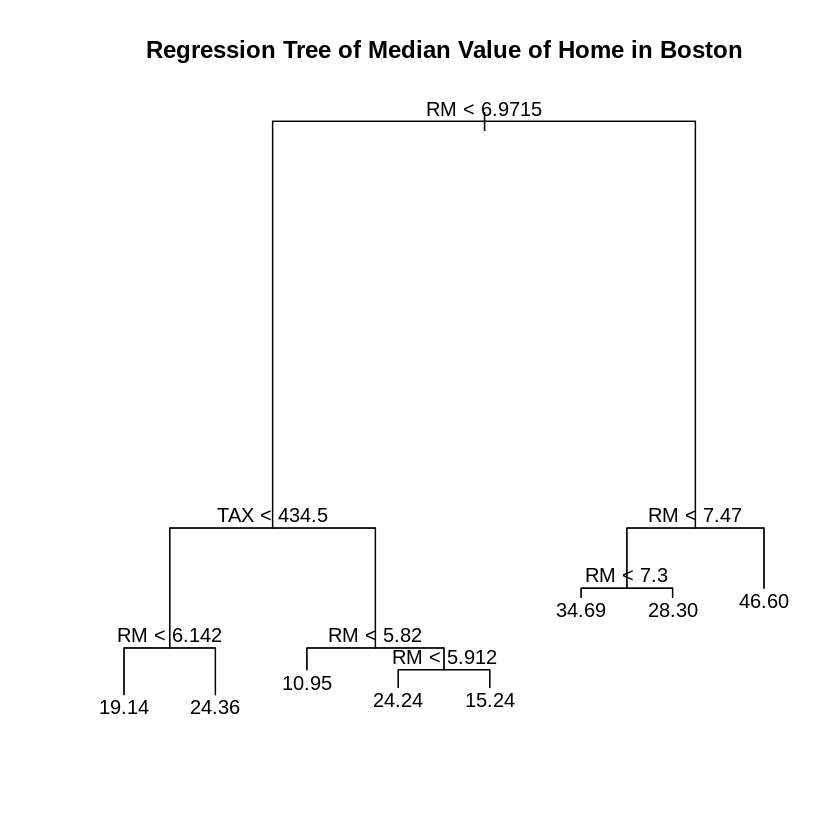

In [ ]:
# Plots Regression Tree
plot(boston_tree)
text(boston_tree, pretty = 0)
title(main = "Regression Tree of Median Value of Home in Boston")

### Partition Tree

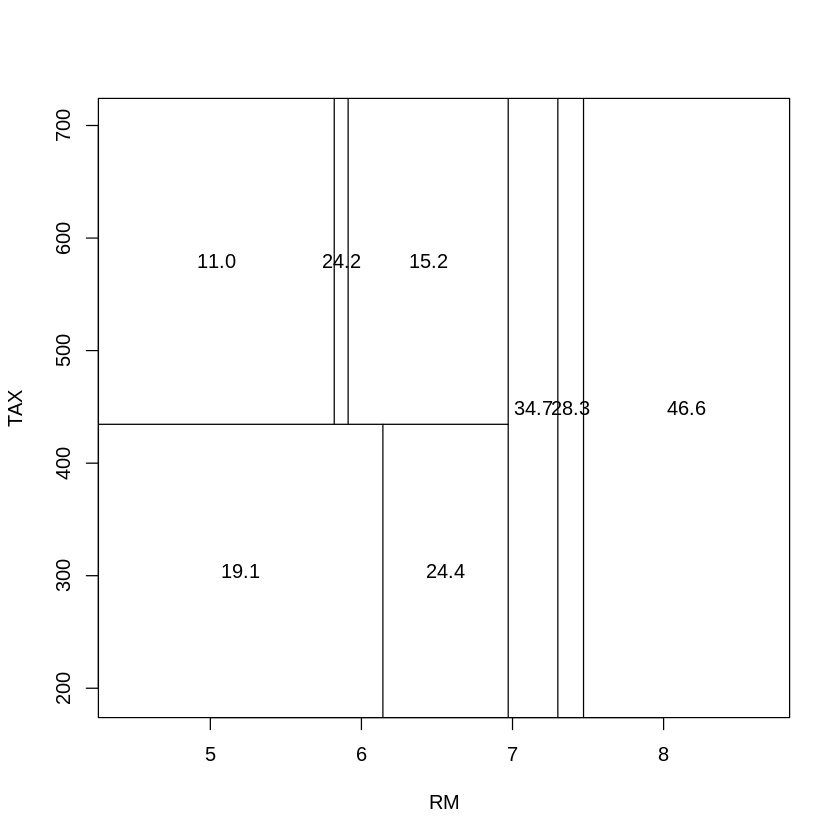

In [ ]:
# Plots Partition Tree
partition.tree(boston_tree)

####Partition Tree Scatter Plot

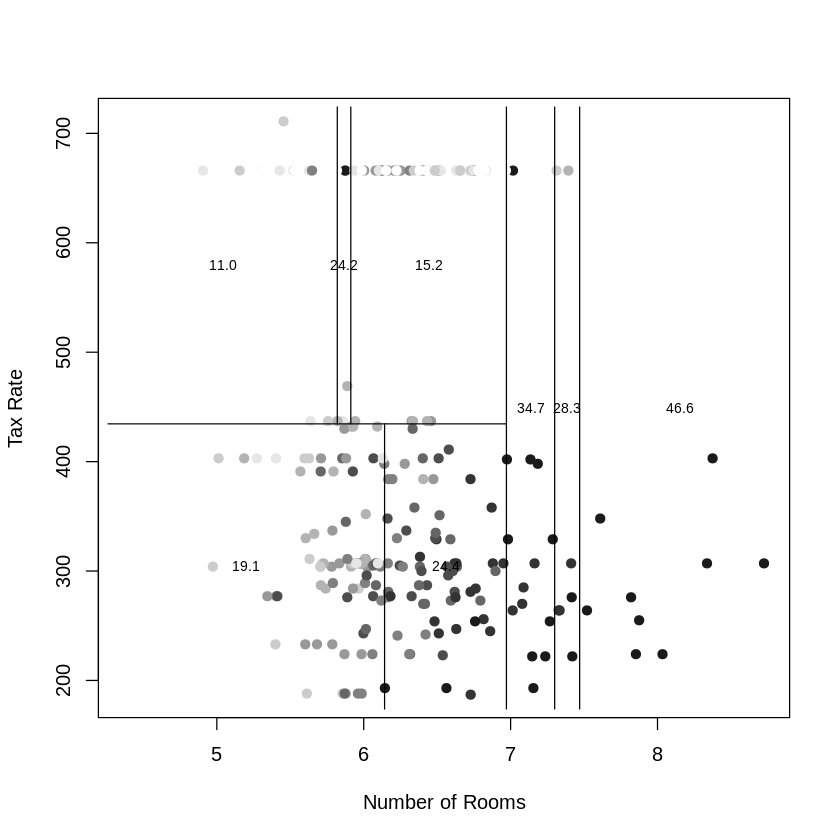

In [ ]:
# Calculates the house median value deciles
price.deciles = quantile(boston_trn$MEDV, 0:10/10)

# Categorize the house median value into bins based on the deciles
cut.prices = cut(boston_trn$MEDV, price.deciles, include.lowest = TRUE)
#summary(cut.prices)

# Plots price bins scatter plot with the partition tree
plot(boston_trn$RM, boston_trn$TAX, col = grey(10:1/10)[cut.prices],
     pch = 19, xlab = "Number of Rooms", ylab = "Tax Rate")
partition.tree(boston_tree, ordvars = c("RM","TAX"), add = TRUE, cex = 0.7)

### Predicting Values with Regression Trees

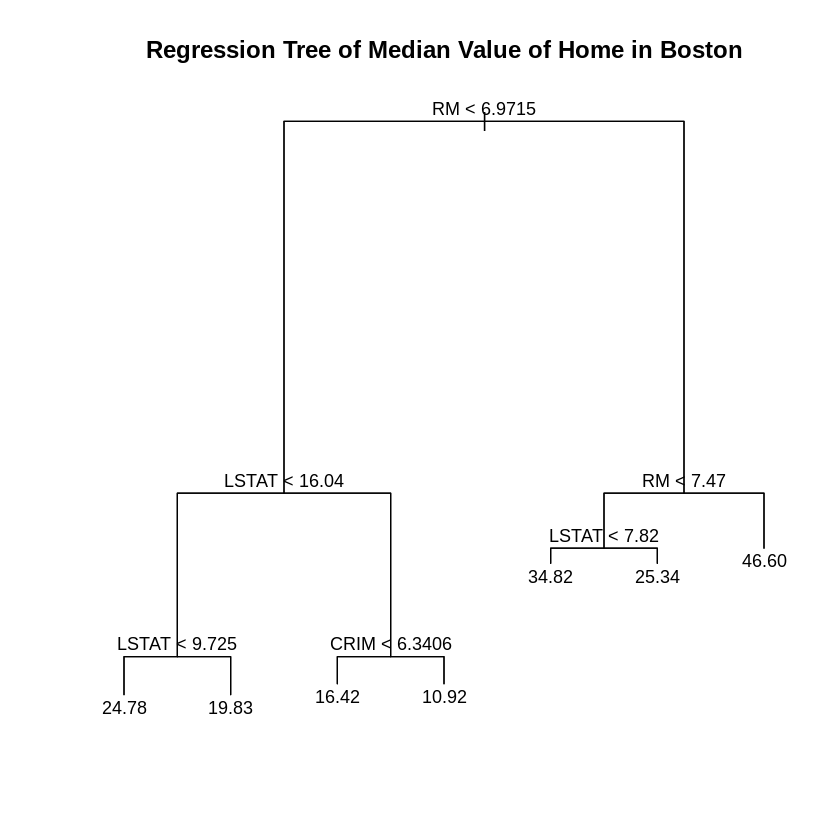

In [ ]:
# All Predictors
boston_treefull = tree(MEDV ~ ., data = boston_trn)
plot(boston_treefull)
text(boston_treefull, pretty = 5,cex = 0.9)
title(main = "Regression Tree of Median Value of Home in Boston")

####Predicting on Training Data Set

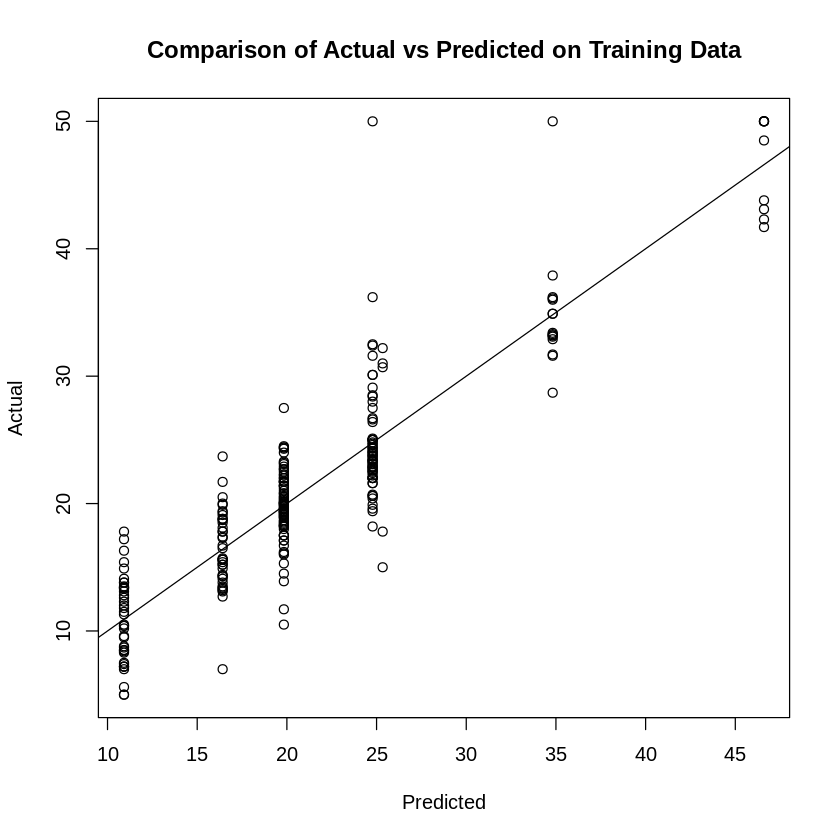

In [ ]:
# Comparing the predicted values with the actual training values
boston_trn_predfull = predict(boston_treefull, newdata = boston_trn)
plot(boston_trn_predfull, boston_trn$MEDV, xlab = "Predicted", ylab = "Actual",
     main= "Comparison of Actual vs Predicted on Training Data")
abline(0, 1)

####Predicting on Testing Data Set

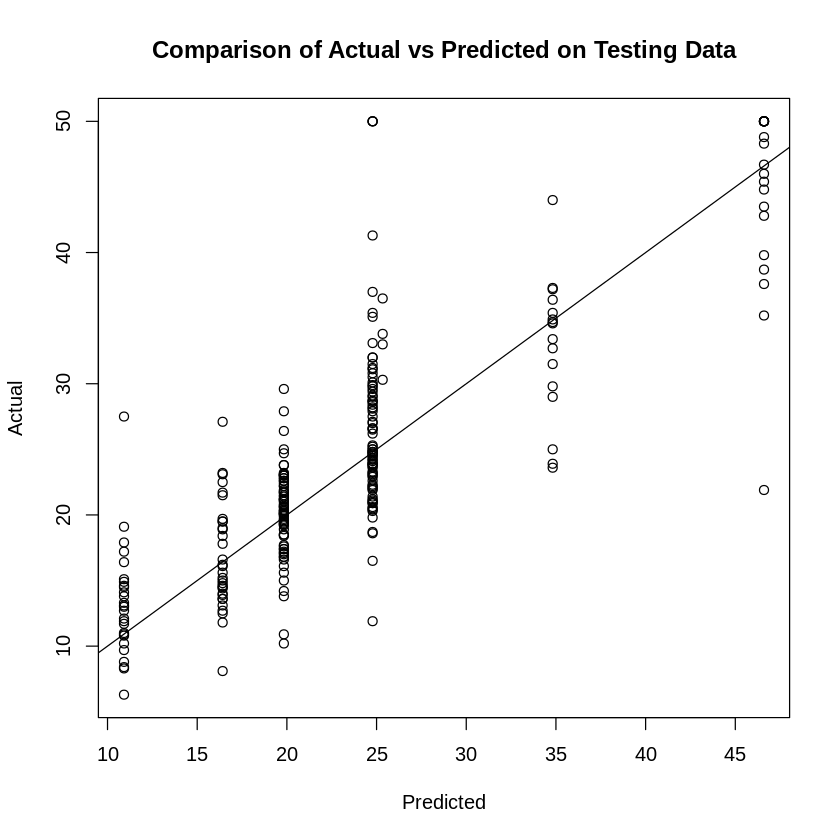

In [ ]:
# Comparing the predicted values with the actual testing values
boston_tst_predfull = predict(boston_treefull, newdata = boston_tst)
plot(boston_tst_predfull, boston_tst$MEDV, xlab = "Predicted", ylab = "Actual",
     main= "Comparison of Actual vs Predicted on Testing Data")
abline(0, 1)

##D. Ensemble Methods (Random Forest)

In [ ]:
library(randomForest)
library(rpart)
library(rpart.plot)
library(MASS)


random_forest_model <- randomForest(MEDV ~ ., data = Boston)

print(random_forest_model)



importance(random_forest_model)

plot(random_forest_model)

single_tree <- getTree(random_forest_model, k = 1, labelVar = TRUE)
tree_model <- rpart(MEDV ~ ., data = Boston)

# Plot the tree
rpart.plot(tree_model)

rf_summary <- summary(random_forest_model)
rf_summary


# Bootstrap Aggregating (Bagging) -> Each tree is built from a bootstrap sample,
# which is a random sample of the training data taken with replacement.
# This means each tree is trained on slightly different data.
#
#
# andom Forest introduces additional randomness.
# Instead of searching for the most significant feature while splitting a node,
# it searches for the best feature among a random subset of the features.

# For regression tasks (like in the Boston housing dataset),
# the final prediction of the Random Forest is the average of the predictions of all trees.

#wide range and less prone to overfitting




# Train the Random Forest model using only chas, rm, and rad as predictors
set.seed(123)  # for reproducibility
rf_model <- randomForest(MEDV ~ CHAS + RM + RAD, data=Boston_clean, ntree=500, mtry=3)
rf_model
# Plot the model
plot(rf_model)
single_tree2 <- getTree(rf_model, k = 1, labelVar = TRUE)
tree_model <- rpart(MEDV ~ CHAS + RM + RAD, data=Boston_clean)

# Plot the tree
rpart.plot(tree_model)
summary(rf_model)


##E. Nearest Neighbors (KNN)

In [ ]:
install.packages(c("caret", "class"))
library(caret)
library(class)

boston_data <- read.csv("/content/HousingData.csv")

set.seed(123)

X <- subset(boston_data, select = -c(MEDV))
y <- boston_data$MEDV

X_scaled <- scale(X)

set.seed(456)
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X_scaled[train_indices, ]
y_train <- y[train_indices]
X_test <- X_scaled[-train_indices, ]
y_test <- y[-train_indices]

set.seed(789)
k_values <- seq(1, 20, by = 1)  # You can adjust the range of k-values as needed

tune_grid <- expand.grid(k = k_values)

knn_model <- train(
  x = X_train,
  y = y_train,
  method = "knn",
  tuneGrid = tune_grid,
  trControl = trainControl(method = "cv", number = 5)
)

print(knn_model)

optimal_k <- knn_model$bestTune$k
print(paste("Optimal k:", optimal_k))

predictions <- predict(knn_model, newdata = X_test)

mse <- mean((predictions - y_test)^2)
print(paste("Mean Squared Error on Test Set:", mse))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in file(file, "rt"):
“cannot open file 'path_to_your_dataset.csv': No such file or directory”


ERROR: ignored

In [ ]:
install.packages("caret")
install.packages("MASS")
install.packages("class")

library(caret)
library(MASS)
library(class)

Boston_clean <- houses_imputed

set.seed(123)
indices <- sample(1:nrow(Boston_clean), size = 0.7*nrow(Boston_clean))
train <- Boston_clean[indices, ]
test <- Boston_clean[-indices, ]

train_control <- trainControl(method="cv", number=10)

grid <- expand.grid(.k=c(1, 2, 3, 5, 9, 20))

set.seed(123)
knn_fit <- train(MEDV ~ ., data=train, method="knn", trControl=train_control, tuneGrid=grid)

print(knn_fit)


library(ggplot2)

data <- data.frame(
  k = c(1,2,3,5,9,20),
  RMSE = c(7.476529, 6.619031, 6.390715, 6.536766, 6.772159, 7.291833)
)

ggplot(data, aes(x = k, y = RMSE)) +
  geom_line() +
  geom_point(size = 4, color = "blue") +
  labs(title = "RMSE vs. k Values",
       x = "k Value",
       y = "RMSE") +
  theme_minimal()


newdata_knn <- data.frame(t(matrix(c(0.02985, 0, 2.18, 0, 0.458, 6.43, 58.7, 6.0622, 3, 222, 18.7, 394.12, 5.21), nrow=13)))

colnames(newdata_knn) <- colnames(Boston_clean[, -which(names(Boston_clean) == "medv")])




# Calculate R^2
R2 <- cor(test$MEDV, predictions)^2

print(R2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



ERROR: ignored

In [ ]:
full_model <-lm(MEDV ~., data = Boston)


Boston <- Boston_clean
# Forward selection, Starting with an intercept-only model
intercept_only_model <- lm(MEDV ~ 1, data = Boston)

forward_model <- step(intercept_only_model, scope = list(lower = intercept_only_model, upper = full_model), direction = "forward", k = 2)
summary(forward_model)


library(ggplot2)

model_coef <- broom::tidy(forward_model)

ggplot(model_coef, aes(x = reorder(term, estimate), y = estimate)) +
  geom_col() +
  coord_flip() +
  labs(title = "Variable Importance in Forward Selection Model",
       x = "Variables",
       y = "Importance")

##F. Principal Component Analysis (PCA)

###Multicollinearity Check using VIF

In [8]:
boston_imputed <- houses_imputed
###########################################
#### Multicollinearity check using VIF ####
###########################################

# Calculate r-squared values for each predictor in a regression against all others.
# Calculate VIF = 1/(1-r2).

lm.model <- lm(MEDV~., data=boston_imputed)

# Regression among predictors, exclude response
X <- model.matrix(lm.model)[,-1]
num_columns <- ncol(X)

# Check VIF
for(i in 1:num_columns){
  r2 <- summary(lm(X[,i]~X[,-i]))$r.squared
  vif <- 1/(1-r2)
  cat(colnames(X)[i], '\t vif=', vif, '\n')
}

# TAX 	    vif= 9.356726 <=
# RAD 	    vif= 7.627798 <=
# NOX 	    vif= 4.418886
# INDUS 	  vif= 4.116382
# DIS 	    vif= 3.928556
# AGE 	    vif= 3.147215
# LSTAT 	  vif= 2.947862
# ZN 	      vif= 2.300429
# RM 	      vif= 1.956531
# PTRATIO   vif= 1.810361
# CRIM 	    vif= 1.805717
# B 	      vif= 1.355184
# CHAS 	    vif= 1.064707

### Interpretation ###
# VIF = 1 indicates no multicollinearity.
# 1 < VIF < 5 indicates moderate multicollinearity.
# 5 < VIF indicates high multicollinearity.

CRIM 	 vif= 1.80379 
ZN 	 vif= 2.308005 
INDUS 	 vif= 4.154346 
CHAS 	 vif= 1.071705 
NOX 	 vif= 4.41111 
RM 	 vif= 1.98018 
AGE 	 vif= 3.099313 
DIS 	 vif= 3.95613 
RAD 	 vif= 7.592857 
TAX 	 vif= 9.249463 
PTRATIO 	 vif= 1.800069 
B 	 vif= 1.360674 
LSTAT 	 vif= 2.994791 
missing_indicator 	 vif= 1.012941 


### Removing High VIF Predictors

In [ ]:
# Remove top 2 (TAX and RAD) to see if it improves multicollinearity
boston_reduced <- boston_imputed[, !(colnames(boston_imputed) %in% c("TAX", "RAD"))]

# New model with less variables
lm_reduced <- lm(MEDV ~ ., data = boston_reduced)

# Regression among predictors
X_reduced <- model.matrix(lm_reduced)[,-1]
num_columns_reduced <- ncol(X_reduced)

# Check VIFs
for(i in 1:num_columns_reduced){
  r2 <- summary(lm(X_reduced[,i]~X_reduced[,-i]))$r.squared
  vif <- 1/(1-r2)
  cat(colnames(X_reduced)[i], '\t vif=', vif, '\n')
}

# NOX 	    vif= 3.947957
# DIS 	    vif= 3.927279
# INDUS 	  vif= 3.168079
# AGE 	    vif= 3.115254
# LSTAT 	  vif= 2.944886
# ZN 	      vif= 2.133531
# RM 	      vif= 1.894896
# PTRATIO 	vif= 1.509085
# CRIM 	    vif= 1.476612
# B 	      vif= 1.325341
# CHAS 	    vif= 1.047084

# Predictors now have low-to-moderate VIF values.

###Standardization

In [ ]:
#########################
#### Standardization ####
#########################

# Standardize variables so that one doesn't "dominate" the PCA process.
# Normalize each column to mean 0 and variance 1 using prcomp (Singular Value Decomposition method)
pr.out <- prcomp(boston_reduced[,-12], scale = TRUE)

# pr.out contains information about the PCA, including:
# the rotation matrix (rotation)
# and principal component scores (x)


### Building Regression Models using PCA

####(a) Elbow-Method to Select Principal Components

In [ ]:
# Elbow Method: Plot the proportion of variance explained (PVE) for each Principal Component.
PVE.matrix <- summary(pr.out)$importance
PVE.matrix
PVE <- PVE.matrix[2,]

plot(PVE, xlab='Principle Component',
     ylab='Proportion of Variance Explained',
     main='PC Selection: Elbow Method')
abline(a=PVE[2], b=0)
text(x=8, y=0.15, labels='Elbow point 2 PCs')

# By eyeballing it, we can choose to focus on the first 2 to 3 Principal Components.


####(b) Variable Importance Defined by Loading Vectors

In [ ]:
# Rotation matrix
rotation_matrix <- pr.out$rotation
dim(rotation_matrix) # 11 11
print(rotation_matrix)

#             PC1         PC2          PC3         PC4          PC5       ...PC11
# CRIM     0.25401081 -0.18507890  0.482053659  0.14079482  0.192641640
# ZN      -0.31372238 -0.10602682  0.384408871  0.22794970 -0.259910833
# INDUS    0.38360979  0.06603976 -0.016549760 -0.01546756 -0.004445812
# CHAS     0.01509543  0.53913894 -0.126842928  0.80221323  0.217380238
# NOX      0.38312520  0.21801507  0.096835900 -0.08691330 -0.212675055
# RM      -0.22694792  0.46322673  0.327389219 -0.38230043  0.408947147
# AGE      0.36717705  0.23916683 -0.044623969 -0.13937754 -0.091865259
# DIS     -0.37370974 -0.30344787  0.043464655  0.22315884 -0.009982370
# PTRATIO  0.21477157 -0.42034881 -0.269003413  0.04688874  0.704729207
# B       -0.21440360  0.10125749 -0.640777617 -0.12216799 -0.162445696
# LSTAT    0.35328242 -0.24725476 -0.009534663  0.21064986 -0.322525105

# Example interpretation: In PC1, NOX has a positive loading (0.38312520), which indicates a positive relationship with PC1.


##################################################
### Cherry-picking variables with big loadings ###
##################################################

# Sort loading vectors for the first three principal components.

# PC1 loading vectors
loading.vector1 <- (rotation_matrix[,1])
round(sort(loading.vector1,decreasing = T), 2)

# PC2 loading vectors
loading.vector2 <- (rotation_matrix[,2])
round(sort(loading.vector2, decreasing = T), 2)

# PC3 loading vectors
loading.vector3 <- (rotation_matrix[,3])
round(sort(loading.vector3, decreasing = T),2)


# If we use +-0.3 as a threshold, we see that the biggest loading vectors for the first three PCs are as follows:
# PC1 (eigenvalue = 8.450789e+03): INDUS, NOX, AGE, LSTAT, ZN, DIS
# PC2 (eigenvalue = 1.003041e+03): CHAS, RM, DIS, PTRATIO
# PC3 (eigenvalue = 2.797024e+02): CRIM, ZN, RM, B
# Combined: INDUS, NOX, AGE, LSTAT, ZN, DIS, CHAS, RM, PTRATIO, CRIM, B (= all predictor variables without TAX and RAD)

#Assembling and Assessing Models

##Leave-One-Out Cross Validation

In [ ]:
######################################
### Leave-one-out Cross-validation ###
######################################

# Create a LOOCV function to assess model performance by looking at mean Mean Squared Errors.
# LOOCV can be computationally intensive but we have a moderate sized data set, so it should work.

perform_loocv <- function(linear_model, data) {
  set.seed(2022)
  MSEs <- c() # Empty vector to save individual MSEs

  # LOOCV
  for (index.test in 1:dim(data)[1]) {
    data.test <- data[index.test, ] # Test set
    data.train <- data[-index.test, ] # Training set
    lm.model <- lm(linear_model, data = data.train) # Fit linear_model on training set
    yhat.test <- predict(lm.model, data.test) # Predict on the test set
    # Calculate test MSE
    y.test <- data.test$MEDV
    MSE.test <- mean((y.test - yhat.test)^2)
    MSEs <- c(MSEs, MSE.test)
  }
  # Plot n MSEs
  plot(1:dim(data)[1], MSEs, type = 'b', col = 'red', xlab = 'Fold', ylab = 'MSE')
  # Return average MSE
  return(mean(MSEs))
}

##Models

In [ ]:
# Datasets
# boston_imputed = original dataset with imputed missing values
# boston_reduced = imputed dataset with TAX and RAD columns removed

# Starting model
all_vars_plus <- lm(MEDV ~ ., data = boston_imputed)

# Reduced model
all_vars <- lm(MEDV ~ ., data = boston_reduced)

# Feature (Forward) selection
# ? ? ? ? ?

# Decision Trees (Regression and Partition)
dec_trees <- lm(MEDV ~ RM + LSTAT + CRIM, data = boston_imputed)

# Ensemble Methods (Random Forest)
rand_forest <- lm(MEDV ~ RM + LSTAT + CRIM + DIS, data = boston_imputed)

# Nearest Neighbors (KNN)
# ? ? ? ? ?

# PCA - Principal Components
PC1 <- lm(MEDV ~ PC1, data = boston_reduced)
PC1PC2 <- lm(MEDV ~ PC1 + PC2, data = boston_reduced)
PC1PC2PC3 <- lm(MEDV ~ PC1 + PC2 + PC3, data = boston_reduced)

# PCA - Using High Loading Variables
PC1_hl <- lm(MEDV ~ INDUS+NOX+AGE+LSTAT+ZN+DIS, data = boston_reduced)
PC2_hl <- lm(MEDV ~ CHAS+RM+DIS+PTRATIO, data = boston_reduced)
PC1PC2_hl <- lm(MEDV ~ INDUS+NOX+AGE+LSTAT+ZN+DIS+CHAS+RM+PTRATIO, data = boston_reduced)

##Model Performance

In [ ]:
# Model           R2          Adj R2      F-stat      p-value       Mean MSEs
# all_vars_plus   0.7404      0.7336      108         < 2.2e-16     23.72
# all_vars        0.7294      0.7234      121         < 2.2e-16     24.59
# dec_trees       0.6431      0.6409      301.5       < 2.2e-16     31.00
# rand_forest     0.6542      0.6514      236.9       < 2.2e-16     30.21
# PC1             0.3923      0.3911      325.4       < 2.2e-16     51.69
# PC1PC2          0.6421      0.6407      451.3       < 2.2e-16     30.78
# PC1PC2PC3       0.6503      0.6482      311.2       < 2.2e-16     30.18
# PC1_hl          0.6226      0.6181      137.2       < 2.2e-16     33.03
# PC2_hl          0.572       0.5685      167.4       < 2.2e-16     37.30
# PC1PC2_hl       0.7197      0.7146      141.5       < 2.2e-16     25.20